# Naive algorithmes

In [1]:
# coding: utf-8
#Chargement des données
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
from sklearn.cluster import KMeans
from collections import Counter
from scipy.stats.mstats import mode
from sklearn.utils import shuffle
import cPickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
def unpickle(file):
    with open(file, 'rb') as fx:
        dict = cPickle.load(fx)
    return dict
images = [[] for i in range(6)]
# 0~4 sont train donnes, 5 est test donne
images[0] = unpickle('./cifar-10-batches-py/data_batch_1')
images[1] = unpickle('./cifar-10-batches-py/data_batch_2')
images[2] = unpickle('./cifar-10-batches-py/data_batch_3')
images[3] = unpickle('./cifar-10-batches-py/data_batch_4')
images[4] = unpickle('./cifar-10-batches-py/data_batch_5')
images[5] = unpickle('./cifar-10-batches-py/test_batch')  

In [2]:
# decision tree
from sklearn import tree
train=list()
test=list()
train_set=images[0]["data"][0:10000]
train_label=images[0]["labels"][0:10000]
test_set=images[5]["data"][2000:5000]
test_label=images[5]["labels"][2000:5000]
clf = tree.DecisionTreeClassifier()
clf.fit(train_set,train_label) 
train.append(np.mean(clf.predict(train_set) == train_label))
test.append(np.mean(clf.predict(test_set) == test_label))
kl=clf.predict(test_set)
     
print("decision tree:",train,test) # affiche taux correct pour train_set et test_set
# Taux correct
a=accuracy_score(kl, test_label)
print(a)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_label, kl, target_names=target_names))

('decision tree:', [1.0], [0.24533333333333332])
0.245333333333
             precision    recall  f1-score   support

          0       0.32      0.33      0.32       292
          1       0.27      0.24      0.26       307
          2       0.21      0.24      0.22       317
          3       0.17      0.17      0.17       298
          4       0.21      0.25      0.23       309
          5       0.17      0.15      0.16       303
          6       0.22      0.25      0.24       275
          7       0.26      0.25      0.26       302
          8       0.33      0.37      0.35       287
          9       0.28      0.22      0.25       310

avg / total       0.25      0.25      0.24      3000



In [3]:
print(type(classification_report(test_label, kl, target_names=target_names)))
#print(list(classification_report(test_label, kl, target_names=target_names)))
print((classification_report(test_label, kl, target_names=target_names))[72:76])
print((classification_report(test_label, kl, target_names=target_names))[125:129])
print((classification_report(test_label, kl, target_names=target_names))[178:182])
s=classification_report(test_label, kl, target_names=target_names)
y=list()
j=72
for i in range(10):
    y.append(float(s[j:j+4]))
    j=j+53
print(y)

<type 'unicode'>
0.32
0.27
0.21
[0.32, 0.27, 0.21, 0.17, 0.21, 0.17, 0.22, 0.26, 0.33, 0.28]


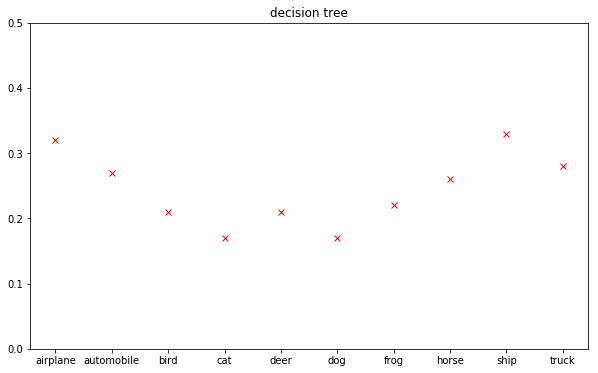

In [4]:
def dessine(s,t):
    y=list()
    j=72
    for i in range(10):
        y.append(float(s[j:j+4]))
        j=j+53
    #print(y)
    x = np.linspace(0,9,10)
    plt.figure(figsize=(10,6))
    plt.title(t)
    plt.ylim((0, 0.5))
    plt.xticks([0, 1, 2, 3, 4,5,6,7,8,9],['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    plt.plot(x, y,'rx',label='train')
    plt.show()
dessine(s,"decision tree")

('svc:', [1.0], [0.10566666666666667])
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       292
          1       0.00      0.00      0.00       307
          2       0.11      1.00      0.19       317
          3       0.00      0.00      0.00       298
          4       0.00      0.00      0.00       309
          5       0.00      0.00      0.00       303
          6       0.00      0.00      0.00       275
          7       0.00      0.00      0.00       302
          8       0.00      0.00      0.00       287
          9       0.00      0.00      0.00       310

avg / total       0.01      0.11      0.02      3000



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


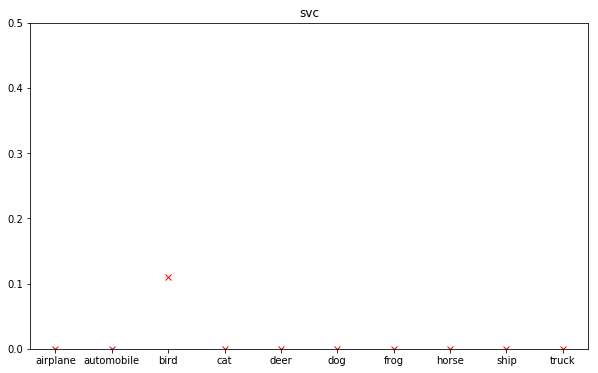

In [5]:
# naive SVC tres lent
from sklearn.svm import SVC
train=list()
test=list()
clf = SVC()
clf.fit(train_set,train_label) 
train.append(np.mean(clf.predict(train_set) == train_label))
test.append(np.mean(clf.predict(test_set) == test_label))
     
print("svc:" ,train,test)

kl=clf.predict(test_set)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_label, kl, target_names=target_names))
sl=classification_report(test_label, kl, target_names=target_names)
dessine(sl,"svc")

('bayes:', [0.29120000000000001], [0.30066666666666669])
             precision    recall  f1-score   support

          0       0.28      0.49      0.36       292
          1       0.37      0.16      0.22       307
          2       0.22      0.09      0.13       317
          3       0.32      0.06      0.11       298
          4       0.26      0.46      0.33       309
          5       0.30      0.30      0.30       303
          6       0.24      0.48      0.32       275
          7       0.32      0.10      0.15       302
          8       0.38      0.48      0.42       287
          9       0.41      0.43      0.42       310

avg / total       0.31      0.30      0.27      3000



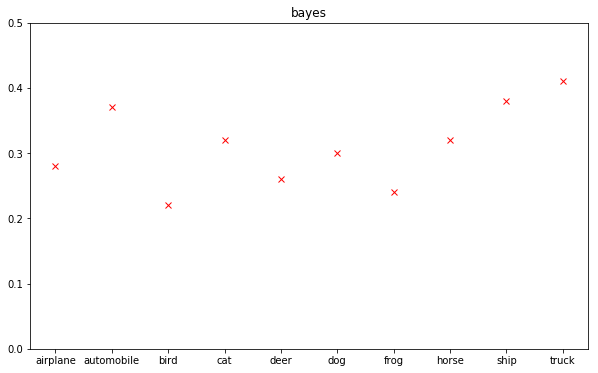

In [6]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
train=list()
test=list()
clf = GaussianNB()
clf.fit(train_set,train_label) 
train.append(np.mean(clf.predict(train_set) == train_label))
test.append(np.mean(clf.predict(test_set) == test_label))
     
print("bayes:",train,test) 
kl=clf.predict(test_set)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_label, kl, target_names=target_names))
sl=classification_report(test_label, kl, target_names=target_names)
dessine(sl,"bayes")

('kneighbor:', [0.38009999999999999], [0.30166666666666669])
             precision    recall  f1-score   support

          0       0.36      0.53      0.43       292
          1       0.74      0.10      0.18       307
          2       0.22      0.45      0.30       317
          3       0.28      0.12      0.17       298
          4       0.21      0.49      0.30       309
          5       0.44      0.16      0.24       303
          6       0.26      0.28      0.27       275
          7       0.58      0.12      0.20       302
          8       0.36      0.65      0.46       287
          9       0.68      0.12      0.20       310

avg / total       0.42      0.30      0.27      3000



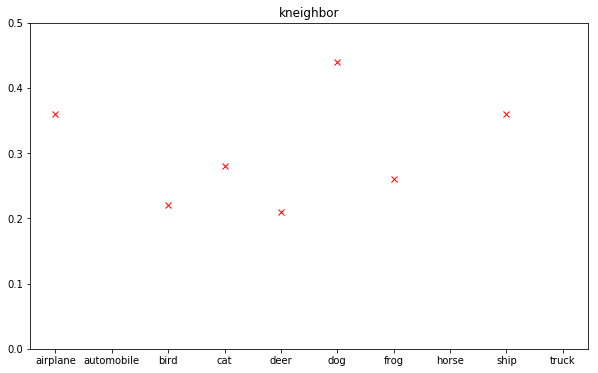

In [18]:
# kneighbor tres lent
from sklearn.neighbors import KNeighborsClassifier
train=list()
test=list()
nt = KNeighborsClassifier(n_neighbors=12)  
nt.fit(train_set,train_label) 
train.append(np.mean(nt.predict(train_set) == train_label))
test.append(np.mean(nt.predict(test_set) == test_label))
print("kneighbor:",train,test)
kl=nt.predict(test_set)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_label, kl, target_names=target_names))
sl=classification_report(test_label, kl, target_names=target_names)
dessine(sl,"kneighbor")

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('perceptron:', [0.3402], [0.29033333333333333])
             precision    recall  f1-score   support

          0       0.54      0.13      0.21       292
          1       0.33      0.58      0.43       307
          2       0.28      0.06      0.09       317
          3       0.41      0.07      0.12       298
          4       0.19      0.66      0.30       309
          5       0.20      0.00      0.01       303
          6       0.34      0.45      0.38       275
          7       0.27      0.54      0.36       302
          8       0.47      0.24      0.32       287
          9       0.60      0.17      0.26       310

avg / total       0.36      0.29      0.25      3000



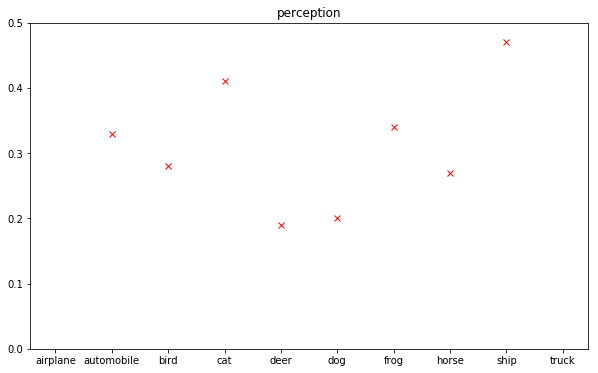

In [8]:
# Percetron rapide
from sklearn.linear_model import Perceptron
train=list()
test=list()
nt = Perceptron()  
nt.fit(train_set,train_label) 
train.append(np.mean(nt.predict(train_set) == train_label))
test.append(np.mean(nt.predict(test_set) == test_label))
print("perceptron:",train,test)
kl=nt.predict(test_set)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_label, kl, target_names=target_names))
sl=classification_report(test_label, kl, target_names=target_names)
dessine(sl,"perception")

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('SGDClassifier:', [0.29449999999999998], [0.25066666666666665])
             precision    recall  f1-score   support

          0       0.38      0.18      0.25       292
          1       0.33      0.42      0.37       307
          2       0.40      0.01      0.02       317
          3       0.27      0.04      0.07       298
          4       0.37      0.24      0.29       309
          5       0.23      0.24      0.24       303
          6       0.41      0.19      0.26       275
          7       0.70      0.06      0.12       302
          8       0.49      0.33      0.40       287
          9       0.15      0.76      0.26       310

avg / total       0.37      0.25      0.23      3000



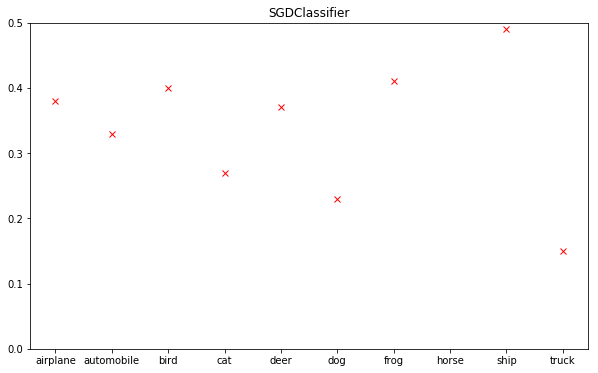

In [9]:
# SGDClassifier rapide
from sklearn.linear_model import SGDClassifier
train=list()
test=list()
nt = SGDClassifier()  
nt.fit(train_set,train_label) 
train.append(np.mean(nt.predict(train_set) == train_label))
test.append(np.mean(nt.predict(test_set) == test_label))
print("SGDClassifier:",train,test)
kl=nt.predict(test_set)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_label, kl, target_names=target_names))
sl=classification_report(test_label, kl, target_names=target_names)
dessine(sl,"SGDClassifier")

# KMeans1

In [19]:
# kmeans1 un peu lent
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score  
train=list()
test=list()
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_set)
k=kmeans.labels_

In [20]:
# explorez les donnes
print(len(kmeans.predict(train_set)))
print(len(train_set))
print(type(train_set))
print(type(k))
print(train_set.shape)
print(k.shape)
kl=list(k)
tl=list(train_set)
print(type(kl))

# cette partie est pour changer label
labels = [[] for i in range(10)]
for i,j in enumerate(kl):
    labels[j].append(i)
#print(labels)

10000
10000
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(10000, 3072)
(10000,)
<type 'list'>


In [21]:
#changer les labels
vrai = [[] for i in range(10)]
for i in range(10):
    vrai[i]=[0]*10
s=[0]*10
#print(vrai)

for j in range(10):
    for i in labels[j]:
        s[j]=s[j]+1
        if(train_label[i]==0):
            vrai[j][0]=vrai[j][0]+1
        elif(train_label[i]==1):
            vrai[j][1]=vrai[j][1]+1
        elif(train_label[i]==2):
            vrai[j][2]=vrai[j][2]+1
        elif(train_label[i]==3):
            vrai[j][3]=vrai[j][3]+1
        elif(train_label[i]==4):
            vrai[j][4]=vrai[j][4]+1
        elif(train_label[i]==5):
            vrai[j][5]=vrai[j][5]+1
        elif(train_label[i]==6):
            vrai[j][6]=vrai[j][6]+1
        elif(train_label[i]==7):
            vrai[j][7]=vrai[j][7]+1   
        elif(train_label[i]==8):
            vrai[j][8]=vrai[j][8]+1
        elif(train_label[i]==9):
            vrai[j][9]=vrai[j][9]+1
for i in range(10):
    #print(vrai[i])
    pass
kchange=[None]*10
i=0
while i<10:
    b=vrai[i].index(max(vrai[i]))
    if b not in kchange:
        kchange[i]=b
        i+=1
    else:
        vrai[i][b]=0
      
     
print(kchange) 
print(kl[0:10])
for i in range(len(kl)):
    kl[i]=kchange[kl[i]]
print(kl[0:10])

[6, 7, 4, 0, 2, 3, 8, 9, 5, 1]
[8, 9, 7, 0, 7, 4, 2, 2, 3, 4]
[5, 1, 9, 6, 9, 2, 4, 4, 0, 2]


0.2061
             precision    recall  f1-score   support

          0       0.24      0.20      0.22      1005
          1       0.18      0.20      0.19       974
          2       0.15      0.20      0.17      1032
          3       0.10      0.05      0.07      1016
          4       0.16      0.25      0.19       999
          5       0.18      0.20      0.19       937
          6       0.25      0.22      0.23      1030
          7       0.16      0.12      0.13      1001
          8       0.34      0.26      0.30      1025
          9       0.29      0.37      0.33       981

avg / total       0.21      0.21      0.20     10000



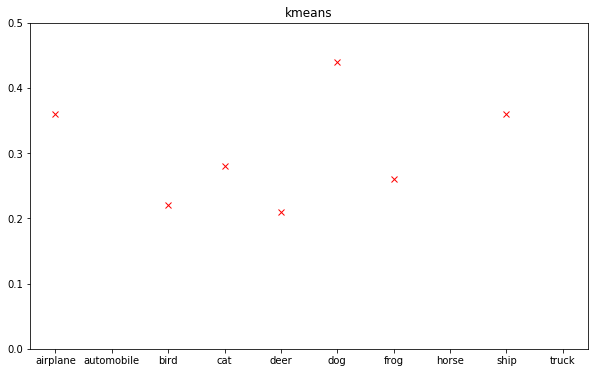

In [22]:
# Taux correct
a=accuracy_score(kl, train_label)
print(a)
target_names = ['0','1', '2', '3','4','5','6','7','8','9']
#sl=classification_report(train_label, kl, target_names=target_names)
print(classification_report(train_label, kl, target_names=target_names))
kl=kmeans.predict(test_set)
#print(classification_report(test_label, kl, target_names=target_names))

dessine(sl,"kmeans")
            

# Kmeans2

In [23]:
# kmeans 2: Un algorithme qui applique l'idée de kmeans
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
from sklearn.cluster import KMeans
from collections import Counter
from scipy.stats.mstats import mode
from sklearn.utils import shuffle

def kmoyen(images):

    t=images
    t=t/float(255)
    t=t.reshape(32,32,3)
    w, h, d = original_shape = tuple(t.shape) 
    image_array = np.reshape(t, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0)[:1024]
    kmeans = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array) 
    codebook=kmeans.cluster_centers_
    d = codebook.shape[1]
    image = np.zeros((w, h, d)) 
    label_idx = 0  
    for k in range(w):  
        for j in range(h):  
            image[k][j] = codebook[labels[label_idx]]  
            label_idx += 1
    image=image.reshape(3072,)
    return image  

def naive(images):
	clusters = [[] for i in range(10)]
	for i in images[0:5]:
		for x in range(10000):
			data = i['data'][x]/float(255)
			label = i['labels'][x]
			clusters[label].append(data)
	for i in range(10):                        

		clusters[i] = np.mean(clusters[i],axis = 0)

        
	return clusters



clusters = naive(images)
print clusters
print "nb ligne de clusters : {0}".format(len(clusters))
print "nb colonne de clusters dans chaque ligne : {0}".format(len(clusters[0]))


# performance
def performance(donnee,clusters):
	import operator
	distance = [0 for i in range (10)]
	partition_ok  = 0.0	
	labels_ok = dict()
	for i in range(10): 
		labels_ok[i] = 0
		
	for i in range(10000):
       
		d = clusters - donnee['data'][i]/float(255)  
		d = np.linalg.norm(d,axis = 1)
		label = np.argmin(d**2)
		if label == donnee['labels'][i]:
			partition_ok = partition_ok + 1
			labels_ok[label] += 1
	partition_ok = partition_ok/10000 * 100
	stat = max(labels_ok.iteritems(), key = operator.itemgetter(1))[0] 
	stat_min = min(labels_ok.iteritems(), key = operator.itemgetter(1))[0]
	labels = unpickle('./cifar-10-batches-py/batches.meta')
	return "le taux de correction : {0}".format(partition_ok), "le label le plus reconnu est : {0}".format(stat), "le label le plus mal reconnu est : {0}".format(stat_min)


pourcentage = performance(images[5], clusters)
print (pourcentage)



[array([ 0.56863686,  0.56468627,  0.56709098, ...,  0.5389702 ,
        0.53795765,  0.54004706]), array([ 0.53619137,  0.53502588,  0.53944392, ...,  0.48939686,
        0.49270275,  0.49684863]), array([ 0.48992706,  0.49056549,  0.49473647, ...,  0.42043451,
        0.41908157,  0.41898588]), array([ 0.47588157,  0.47583843,  0.47937333, ...,  0.44116392,
        0.43744314,  0.43561804]), array([ 0.42010275,  0.42083922,  0.42615059, ...,  0.39481647,
        0.3937302 ,  0.39187529]), array([ 0.42462039,  0.42233255,  0.42624549, ...,  0.4153302 ,
        0.41190902,  0.41072235]), array([ 0.45136314,  0.44788392,  0.44993412, ...,  0.39921098,
        0.39855451,  0.40008392]), array([ 0.52933647,  0.52404863,  0.52667294, ...,  0.41744471,
        0.41961255,  0.42526275]), array([ 0.57362039,  0.57005176,  0.57373255, ...,  0.45261725,
        0.45694353,  0.46232471]), array([ 0.65623137,  0.65227137,  0.65585255, ...,  0.49455922,
        0.49897647,  0.50379451])]
nb ligne 